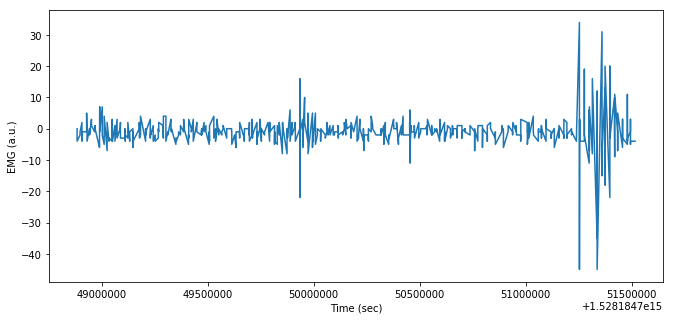

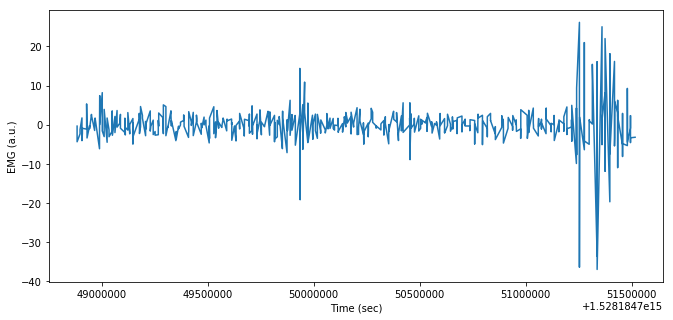

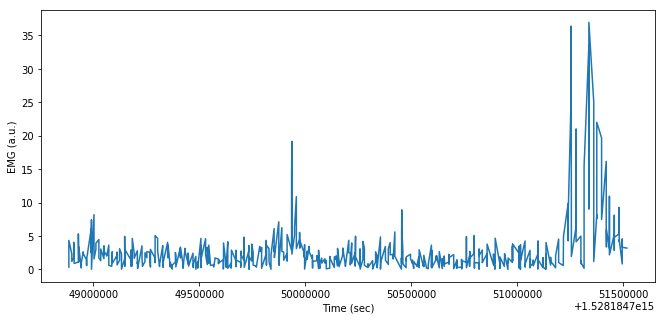

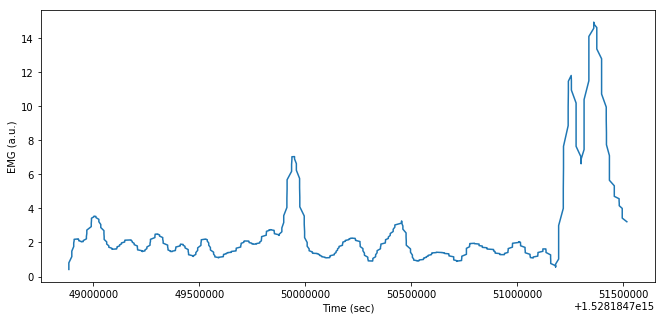

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import csv
import scipy as sp
from scipy import signal


%matplotlib inline


fileLocation = "trimmed_data/ano/emg11-Right.csv"
df = pd.read_csv(fileLocation)

time = np.array(df['timestamp'].values)
# df = df.drop("timestamp", axis=1)

emg = np.array(df['emg1'].values)

emg_correctmean = emg - np.mean(emg)

# create bandpass filter for EMG
high = 2/(100/2)
low = 45/(100/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

emg_filtered = sp.signal.filtfilt(b, a, emg_correctmean)

emg_rectified = abs(emg_filtered)



    # create lowpass filter and apply to rectified signal to get EMG envelope
sfreq = 100
low_pass = 10/sfreq
b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
emg_envelope = sp.signal.filtfilt(b2, a2, emg_rectified)

fig = plt.figure()
plt.plot(time, emg)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')
fig_name = 'fig3.png'
fig.set_size_inches(w=11,h=5)
fig.savefig(fig_name)

fig = plt.figure()
plt.plot(time, emg_filtered)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')
fig_name = 'fig3.png'
fig.set_size_inches(w=11,h=5)
fig.savefig(fig_name)

fig = plt.figure()
plt.plot(time, emg_rectified)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')
fig_name = 'fig3.png'
fig.set_size_inches(w=11,h=5)
fig.savefig(fig_name)

fig = plt.figure()
plt.plot(time, emg_envelope)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')
fig_name = 'fig3.png'
fig.set_size_inches(w=11,h=5)
fig.savefig(fig_name)

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import csv
import scipy as sp
from scipy import signal


%matplotlib inline


fileLocation = "trimmed_data/ano/emg11-Right.csv"
df = pd.read_csv(fileLocation)

time = np.array(df['timestamp'].values)
df = df.drop("timestamp", axis=1)

for r in df:
    emg = np.array(df[r].values)

    emg_correctmean = emg - np.mean(emg)

    # create bandpass filter for EMG
    high = 2/(100/2)
    low = 45/(100/2)
    b, a = sp.signal.butter(4, [high,low], btype='bandpass')

    emg_filtered = sp.signal.filtfilt(b, a, emg_correctmean)

    emg_rectified = abs(emg_filtered)



    # create lowpass filter and apply to rectified signal to get EMG envelope
    sfreq = 100
    low_pass = 10/sfreq
    b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
    emg_envelope = sp.signal.filtfilt(b2, a2, emg_rectified)
    
    df[r] = emg_envelope
    
print("done")

done


In [109]:
df.to_csv('passfilter.csv', encoding='utf-8', index=False)


In [104]:
for r in df:
    print(r)

timestamp
emg1
emg2
emg3
emg4
emg5
emg6
emg7
emg8


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import csv
import scipy as sp
from scipy import signal


%matplotlib inline

for i in range(0,100):
    fileLocation = "trimmed_data/ano/emg"+str(i)+"-Right.csv"
    df = pd.read_csv(fileLocation)

    time = np.array(df['timestamp'].values)
    emg = np.array(df['emg1'].values)

    emg_correctmean = emg - np.mean(emg)

    # create bandpass filter for EMG
    high = 10/(50/2)
    low = 25/(50/2)
    b, a = sp.signal.butter(4, [high,low], btype='bandpass')

    emg_filtered = sp.signal.filtfilt(b, a, emg_correctmean)

    emg_rectified = abs(emg_filtered)

        # create lowpass filter and apply to rectified signal to get EMG envelope
    sfreq = 50
    low_pass = 25/sfreq
    b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
    emg_envelope = sp.signal.filtfilt(b2, a2, emg_rectified)

    fig = plt.figure()
    plt.plot(time, emg_envelope)
    plt.xlabel('Time (sec)')
    plt.ylabel('EMG (a.u.)')
    fig_name = 'fig3.png'
    fig.set_size_inches(w=11,h=5)
    fig.savefig(fig_name)

In [ ]:
emg_correctmean
